In [6]:
import pandas as pd
import numpy as np

fn = ['TBSM_TRDAR_FLPOP_QU.csv', 'TBSM_TRDAR_SELNG_QU.csv', 'TBSM_TRDAR_STOR_QU.csv',
     'AddData/TBSM_TRDAR_BDPOP_QU.csv',
     'AddData/TBSM_TRDAR_BEING_RT_QU.csv',
     'AddData/TBSM_TRDAR_HOUSINCOM_QU.csv',
      'AddData/TBSM_TRDAR_REPOP_QU.csv',
     'AddData/TBSM_TRDAR_SALE_MT_QU.csv', 'AddData/TBSM_TRDAR_SURV_RT_QU.csv',
     'AddData/TBSM_TRDAR_WRC_POPLTN.csv', 'AddData/TBSM_TRDAR_FCLTY.csv',
     'VW_TRDAR_CMMN_INFO.csv']
cf = ['소비데이터.csv', 'VW_TRDAR_CMMN_INFO.csv',
      'AddData/TBSM_TRDAR_APT.csv',
      'AddData/TBSM_TRDAR_RENT_CURPRC_QU.csv']

df = []
for idx, fname in enumerate(fn):
    df.append(pd.read_csv(fname, encoding='cp949', sep="|"))
    
df[10].fillna(0, inplace = True)        

df

[       STDR_YY_CD  STDR_QU_CD TRDAR_SE_CD  TRDAR_CD  TOT_FLPOP_CO  \
 0            2019           1           A   2110001        178589   
 1            2019           1           A   2110002        317569   
 2            2019           1           A   2110003        374230   
 3            2019           1           A   2110004        331428   
 4            2019           1           A   2110005        144677   
 ...           ...         ...         ...       ...           ...   
 24932        2022           3           R   2130322        254824   
 24933        2022           3           R   2130323        343847   
 24934        2022           3           R   2130324        486493   
 24935        2022           3           R   2130325        203108   
 24936        2022           3           R   2130326        140332   
 
        ML_FLPOP_CO  FML_FLPOP_CO  AGRDE_10_FLPOP_CO  AGRDE_20_FLPOP_CO  \
 0            78375        100215              31848              17423   
 1      

In [7]:
len(df)

12

In [8]:
merge_df = df[0]
for idx, dfName in enumerate(df):
    if idx not in [10, 11]:
        dfName = dfName.sort_values(by = ['TRDAR_CD', 'STDR_YY_CD', 'STDR_QU_CD', 'TRDAR_SE_CD'],
                      ascending=[True ,True, True, False])
    if idx == 0:
        merge_df = dfName
        print(merge_df.shape)
    elif idx in [10, 11]:
        merge_df = pd.merge(merge_df, dfName,
                            on = ['TRDAR_CD'],
                            how = 'left')
        print(merge_df.shape)
    else:
        merge_df = pd.merge(merge_df, dfName,
                            on = ['TRDAR_CD', 'STDR_YY_CD', 'STDR_QU_CD', 'TRDAR_SE_CD'],
                            how = 'left')
        print(merge_df.shape)

merge_df

(24937, 531)
(24937, 604)
(24937, 612)
(24937, 1139)
(24937, 1155)
(24937, 1157)
(24937, 1182)


C:\Users\Poco\AppData\Local\Temp\ipykernel_15612\890412912.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'SVC_INDUTY_CD_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_df = pd.merge(merge_df, dfName,


(24937, 1189)
(24937, 1205)


C:\Users\Poco\AppData\Local\Temp\ipykernel_15612\890412912.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'RELM_AR_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge_df = pd.merge(merge_df, dfName,


(24937, 1227)
(24937, 1249)
(24937, 1258)


,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2019,1,A,2110001,178589,78375,100215,31848,17423,17241,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2019,2,A,2110001,171975,75874,96102,30474,16449,17141,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
2,2019,3,A,2110001,131237,59665,71572,23995,13954,12523,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
3,2019,4,A,2110001,150599,68787,81812,27272,16160,14101,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
4,2020,1,A,2110001,185449,83569,101880,33204,19540,17491,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2021,3,R,2130326,154278,69827,84451,25731,15089,26444,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24933,2021,4,R,2130326,159978,73096,86882,28652,14747,27373,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24934,2022,1,R,2130326,145517,67147,78370,24334,13530,26184,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24935,2022,2,R,2130326,138559,63251,75308,24916,12761,23376,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."


In [9]:
merge_df.to_csv('merge_df.csv', index=False)

In [29]:
# 여기서부터 실행!
import numpy as np
import pandas as pd
merge_df = pd.read_csv('merge_df.csv')

In [82]:
header = merge_df.columns
data = merge_df.values

In [83]:
for idx, label in enumerate(header):
    print(idx, label)

0 STDR_YY_CD
1 STDR_QU_CD
2 TRDAR_SE_CD_x
3 TRDAR_CD
4 TOT_FLPOP_CO_x
5 ML_FLPOP_CO_x
6 FML_FLPOP_CO_x
7 AGRDE_10_FLPOP_CO_x
8 AGRDE_20_FLPOP_CO_x
9 AGRDE_30_FLPOP_CO_x
10 AGRDE_40_FLPOP_CO_x
11 AGRDE_50_FLPOP_CO_x
12 AGRDE_60_ABOVE_FLPOP_CO_x
13 TMZON_1_FLPOP_CO_x
14 TMZON_2_FLPOP_CO_x
15 TMZON_3_FLPOP_CO_x
16 TMZON_4_FLPOP_CO_x
17 TMZON_5_FLPOP_CO_x
18 TMZON_6_FLPOP_CO_x
19 MON_FLPOP_CO_x
20 TUES_FLPOP_CO_x
21 WED_FLPOP_CO_x
22 THUR_FLPOP_CO_x
23 FRI_FLPOP_CO_x
24 SAT_FLPOP_CO_x
25 SUN_FLPOP_CO_x
26 MAG_10_MONTM_1_FLPOP_CO_x
27 MAG_10_MONTM_2_FLPOP_CO_x
28 MAG_10_MONTM_3_FLPOP_CO_x
29 MAG_10_MONTM_4_FLPOP_CO_x
30 MAG_10_MONTM_5_FLPOP_CO_x
31 MAG_10_MONTM_6_FLPOP_CO_x
32 MAG_10_TUETM_1_FLPOP_CO_x
33 MAG_10_TUETM_2_FLPOP_CO_x
34 MAG_10_TUETM_3_FLPOP_CO_x
35 MAG_10_TUETM_4_FLPOP_CO_x
36 MAG_10_TUETM_5_FLPOP_CO_x
37 MAG_10_TUETM_6_FLPOP_CO_x
38 MAG_10_WEDTM_1_FLPOP_CO_x
39 MAG_10_WEDTM_2_FLPOP_CO_x
40 MAG_10_WEDTM_3_FLPOP_CO_x
41 MAG_10_WEDTM_4_FLPOP_CO_x
42 MAG_10_WEDTM_5_FLPOP_CO_x
43 

860 MAG_60_ABOVE_WEDTM_5_FLPOP_CO_y
861 MAG_60_ABOVE_WEDTM_6_FLPOP_CO_y
862 MAG_60_ABOVE_THUTM_1_FLPOP_CO_y
863 MAG_60_ABOVE_THUTM_2_FLPOP_CO_y
864 MAG_60_ABOVE_THUTM_3_FLPOP_CO_y
865 MAG_60_ABOVE_THUTM_4_FLPOP_CO_y
866 MAG_60_ABOVE_THUTM_5_FLPOP_CO_y
867 MAG_60_ABOVE_THUTM_6_FLPOP_CO_y
868 MAG_60_ABOVE_FRITM_1_FLPOP_CO_y
869 MAG_60_ABOVE_FRITM_2_FLPOP_CO_y
870 MAG_60_ABOVE_FRITM_3_FLPOP_CO_y
871 MAG_60_ABOVE_FRITM_4_FLPOP_CO_y
872 MAG_60_ABOVE_FRITM_5_FLPOP_CO_y
873 MAG_60_ABOVE_FRITM_6_FLPOP_CO_y
874 MAG_60_ABOVE_SATTM_1_FLPOP_CO_y
875 MAG_60_ABOVE_SATTM_2_FLPOP_CO_y
876 MAG_60_ABOVE_SATTM_3_FLPOP_CO_y
877 MAG_60_ABOVE_SATTM_4_FLPOP_CO_y
878 MAG_60_ABOVE_SATTM_5_FLPOP_CO_y
879 MAG_60_ABOVE_SATTM_6_FLPOP_CO_y
880 MAG_60_ABOVE_SUNTM_1_FLPOP_CO_y
881 MAG_60_ABOVE_SUNTM_2_FLPOP_CO_y
882 MAG_60_ABOVE_SUNTM_3_FLPOP_CO_y
883 MAG_60_ABOVE_SUNTM_4_FLPOP_CO_y
884 MAG_60_ABOVE_SUNTM_5_FLPOP_CO_y
885 MAG_60_ABOVE_SUNTM_6_FLPOP_CO_y
886 FAG_10_MONTM_1_FLPOP_CO_y
887 FAG_10_MONTM_2_FLPOP_CO_y
888 

1252 SIGNGU_CD
1253 ADSTRD_CD
1254 TRDHL_MLSFC_TY_CD
1255 X_VALUE
1256 Y_VALUE
1257 SHAPE_FRM_INFO


In [33]:
def Corr(col1):
    corr_list = []
    for i in range(len(header)):
        try:
            col2 = merge_df.iloc[:, i]
            corr = col1.corr(col2)
        except:
            corr = np.nan
        print(i, header[i], corr) # 출력을 원하지 않으면 주석처리!
        corr_list.append((header[i], corr))
    
    return corr_list

In [34]:
# 상관계수 리스트 반환
col1 = merge_df.iloc[:, 532]/merge_df.iloc[:, 603]
corr1 = Corr(col1)

0 STDR_YY_CD 0.15977296613068825
1 STDR_QU_CD -0.010481390498168704
2 TRDAR_SE_CD_x nan
3 TRDAR_CD 0.18827771065483276
4 TOT_FLPOP_CO_x -0.020814595952061032
5 ML_FLPOP_CO_x -0.011413073443446352
6 FML_FLPOP_CO_x -0.029193934863839886
7 AGRDE_10_FLPOP_CO_x -0.06474933744356083
8 AGRDE_20_FLPOP_CO_x 0.046992105007472
9 AGRDE_30_FLPOP_CO_x 0.034627292709634674
10 AGRDE_40_FLPOP_CO_x 0.005307724699434159
11 AGRDE_50_FLPOP_CO_x -0.05551360044943488
12 AGRDE_60_ABOVE_FLPOP_CO_x -0.1030234113811912
13 TMZON_1_FLPOP_CO_x -0.11101949205109866
14 TMZON_2_FLPOP_CO_x -0.03432266694180292
15 TMZON_3_FLPOP_CO_x 0.05682305492272651
16 TMZON_4_FLPOP_CO_x 0.06952594824029779
17 TMZON_5_FLPOP_CO_x 0.03371982624072757
18 TMZON_6_FLPOP_CO_x -0.058663328518215645
19 MON_FLPOP_CO_x -0.015173895194344129
20 TUES_FLPOP_CO_x -0.008354965787349533
21 WED_FLPOP_CO_x -0.008567649111581596
22 THUR_FLPOP_CO_x -0.007084655373330116
23 FRI_FLPOP_CO_x -0.005085083733506748
24 SAT_FLPOP_CO_x -0.03868688077313542
25 SU

200 MAG_50_TUETM_1_FLPOP_CO_x -0.12214210772658333
201 MAG_50_TUETM_2_FLPOP_CO_x 0.01664756670096842
202 MAG_50_TUETM_3_FLPOP_CO_x 0.08628857948153563
203 MAG_50_TUETM_4_FLPOP_CO_x 0.08477069015902447
204 MAG_50_TUETM_5_FLPOP_CO_x 0.02436494280275802
205 MAG_50_TUETM_6_FLPOP_CO_x -0.07775757975908709
206 MAG_50_WEDTM_1_FLPOP_CO_x -0.12096000464685573
207 MAG_50_WEDTM_2_FLPOP_CO_x 0.013332032914826231
208 MAG_50_WEDTM_3_FLPOP_CO_x 0.08379456202731574
209 MAG_50_WEDTM_4_FLPOP_CO_x 0.08270080112692366
210 MAG_50_WEDTM_5_FLPOP_CO_x 0.022262042999540075
211 MAG_50_WEDTM_6_FLPOP_CO_x -0.07788689854168387
212 MAG_50_THUTM_1_FLPOP_CO_x -0.1214280254757778
213 MAG_50_THUTM_2_FLPOP_CO_x 0.014642892486665128
214 MAG_50_THUTM_3_FLPOP_CO_x 0.08562308632033794
215 MAG_50_THUTM_4_FLPOP_CO_x 0.08434552932203652
216 MAG_50_THUTM_5_FLPOP_CO_x 0.025865424753530396
217 MAG_50_THUTM_6_FLPOP_CO_x -0.0758623624280236
218 MAG_50_FRITM_1_FLPOP_CO_x -0.12071978364811421
219 MAG_50_FRITM_2_FLPOP_CO_x 0.012308225

405 FAG_40_MONTM_2_FLPOP_CO_x -0.009620149079802033
406 FAG_40_MONTM_3_FLPOP_CO_x 0.08789525553319949
407 FAG_40_MONTM_4_FLPOP_CO_x 0.09031745533028641
408 FAG_40_MONTM_5_FLPOP_CO_x 0.028856825758873283
409 FAG_40_MONTM_6_FLPOP_CO_x -0.07173536329962982
410 FAG_40_TUETM_1_FLPOP_CO_x -0.11152526497907087
411 FAG_40_TUETM_2_FLPOP_CO_x -0.0015540237240355935
412 FAG_40_TUETM_3_FLPOP_CO_x 0.09756865326430808
413 FAG_40_TUETM_4_FLPOP_CO_x 0.09832257791387526
414 FAG_40_TUETM_5_FLPOP_CO_x 0.038420214658977866
415 FAG_40_TUETM_6_FLPOP_CO_x -0.06748166316174299
416 FAG_40_WEDTM_1_FLPOP_CO_x -0.11071152857062455
417 FAG_40_WEDTM_2_FLPOP_CO_x -0.004819125304322709
418 FAG_40_WEDTM_3_FLPOP_CO_x 0.0950380841278782
419 FAG_40_WEDTM_4_FLPOP_CO_x 0.09722844544426766
420 FAG_40_WEDTM_5_FLPOP_CO_x 0.03827701515062361
421 FAG_40_WEDTM_6_FLPOP_CO_x -0.06663452339187753
422 FAG_40_THUTM_1_FLPOP_CO_x -0.11044136124641885
423 FAG_40_THUTM_2_FLPOP_CO_x -0.003637703421599893
424 FAG_40_THUTM_3_FLPOP_CO_x 0.09

605 STOR_CO_y 0.20601858501682122
606 SIMILR_INDUTY_STOR_CO 0.24329020541118995
607 OPBIZ_RT -0.05097535830738801
608 OPBIZ_STOR_CO 0.14193550705295188
609 CLSBIZ_RT -0.019526911230134277
610 CLSBIZ_STOR_CO 0.14579306163789799
611 FRC_STOR_CO 0.27752966718023486
612 TOT_FLPOP_CO_y 0.1872741946293257
613 ML_FLPOP_CO_y 0.1893669283907922
614 FML_FLPOP_CO_y 0.18276216004014753
615 AGRDE_10_FLPOP_CO_y 0.11300805875991891
616 AGRDE_20_FLPOP_CO_y 0.2012168653620614
617 AGRDE_30_FLPOP_CO_y 0.2151451921916815
618 AGRDE_40_FLPOP_CO_y 0.20942404833199454
619 AGRDE_50_FLPOP_CO_y 0.1591816904866559
620 AGRDE_60_ABOVE_FLPOP_CO_y 0.09614972661562611
621 TMZON_1_FLPOP_CO_y 0.03129028689159216
622 TMZON_2_FLPOP_CO_y 0.1724664076177038
623 TMZON_3_FLPOP_CO_y 0.24238987665805606
624 TMZON_4_FLPOP_CO_y 0.2525916315569006
625 TMZON_5_FLPOP_CO_y 0.23235433422328047
626 TMZON_6_FLPOP_CO_y 0.12530255851187372
627 MON_FLPOP_CO_y 0.19089763735199874
628 TUES_FLPOP_CO_y 0.19636940516759216
629 WED_FLPOP_CO_y 0.

803 MAG_50_MONTM_2_FLPOP_CO_y 0.19765994271304796
804 MAG_50_MONTM_3_FLPOP_CO_y 0.2215387187633098
805 MAG_50_MONTM_4_FLPOP_CO_y 0.22460718569849683
806 MAG_50_MONTM_5_FLPOP_CO_y 0.2093428932011344
807 MAG_50_MONTM_6_FLPOP_CO_y 0.1097375454513189
808 MAG_50_TUETM_1_FLPOP_CO_y 0.02605545977018083
809 MAG_50_TUETM_2_FLPOP_CO_y 0.20175294992045978
810 MAG_50_TUETM_3_FLPOP_CO_y 0.22446825460578265
811 MAG_50_TUETM_4_FLPOP_CO_y 0.22717412912260812
812 MAG_50_TUETM_5_FLPOP_CO_y 0.21365698035207
813 MAG_50_TUETM_6_FLPOP_CO_y 0.11400044932330476
814 MAG_50_WEDTM_1_FLPOP_CO_y 0.027770790726696873
815 MAG_50_WEDTM_2_FLPOP_CO_y 0.20013872538286112
816 MAG_50_WEDTM_3_FLPOP_CO_y 0.22500729210842346
817 MAG_50_WEDTM_4_FLPOP_CO_y 0.22792403591264954
818 MAG_50_WEDTM_5_FLPOP_CO_y 0.21256855393633184
819 MAG_50_WEDTM_6_FLPOP_CO_y 0.11260252116087505
820 MAG_50_THUTM_1_FLPOP_CO_y 0.027059740425102907
821 MAG_50_THUTM_2_FLPOP_CO_y 0.200763472072549
822 MAG_50_THUTM_3_FLPOP_CO_y 0.22582564406332425
823 MA

998 FAG_30_FRITM_5_FLPOP_CO_y 0.2651206899673463
999 FAG_30_FRITM_6_FLPOP_CO_y 0.17316841149392215
1000 FAG_30_SATTM_1_FLPOP_CO_y 0.07461182962458214
1001 FAG_30_SATTM_2_FLPOP_CO_y 0.13760862870890286
1002 FAG_30_SATTM_3_FLPOP_CO_y 0.24812737670061843
1003 FAG_30_SATTM_4_FLPOP_CO_y 0.26748133721027867
1004 FAG_30_SATTM_5_FLPOP_CO_y 0.2528998699413986
1005 FAG_30_SATTM_6_FLPOP_CO_y 0.14836742322131624
1006 FAG_30_SUNTM_1_FLPOP_CO_y 0.06833685598683802
1007 FAG_30_SUNTM_2_FLPOP_CO_y 0.10385399690222706
1008 FAG_30_SUNTM_3_FLPOP_CO_y 0.22104727010762887
1009 FAG_30_SUNTM_4_FLPOP_CO_y 0.249299816098411
1010 FAG_30_SUNTM_5_FLPOP_CO_y 0.218491217990319
1011 FAG_30_SUNTM_6_FLPOP_CO_y 0.1073297454445849
1012 FAG_40_MONTM_1_FLPOP_CO_y 0.016363133597821822
1013 FAG_40_MONTM_2_FLPOP_CO_y 0.2018456163483775
1014 FAG_40_MONTM_3_FLPOP_CO_y 0.26002357961881045
1015 FAG_40_MONTM_4_FLPOP_CO_y 0.26441189299031254
1016 FAG_40_MONTM_5_FLPOP_CO_y 0.24116110208915917
1017 FAG_40_MONTM_6_FLPOP_CO_y 0.1158831

1208 MAG_10_SATTM_2_FLPOP_CO -0.09705544654784114
1209 MAG_10_SATTM_3_FLPOP_CO -0.024127971299134153
1210 MAG_10_SATTM_4_FLPOP_CO 0.009004212232345193
1211 MAG_10_SATTM_5_FLPOP_CO 0.004893943361985186
1212 MAG_10_SATTM_6_FLPOP_CO -0.07419939045860516
1213 MAG_10_SUNTM_1_FLPOP_CO -0.11713564048354329
1214 MAG_10_SUNTM_2_FLPOP_CO -0.10509893539829548
1215 MAG_10_SUNTM_3_FLPOP_CO -0.04189548145018865
1216 MAG_10_SUNTM_4_FLPOP_CO -0.004272655612286793
1217 MAG_10_SUNTM_5_FLPOP_CO -0.015966006540263148
1218 MAG_10_SUNTM_6_FLPOP_CO -0.08838965596265579
1219 MAG_20_MONTM_1_FLPOP_CO -0.058052884646779705
1220 MAG_20_MONTM_2_FLPOP_CO 0.010671663481861023
1221 MAG_20_MONTM_3_FLPOP_CO 0.09048649202794931
1222 MAG_20_MONTM_4_FLPOP_CO 0.10512349875800117
1223 MAG_20_MONTM_5_FLPOP_CO 0.08748799941671441
1224 MAG_20_MONTM_6_FLPOP_CO 0.010662137592366828
1225 MAG_20_TUETM_1_FLPOP_CO -0.05748489747922679
1226 MAG_20_TUETM_2_FLPOP_CO 0.01411853746886125
1227 MAG_20_TUETM_3_FLPOP_CO 0.09475704369847437
1

1407 MAG_60_ABOVE_THUTM_3_FLPOP_CO 0.0011738596826969953
1408 MAG_60_ABOVE_THUTM_4_FLPOP_CO 0.0011318705979632858
1409 MAG_60_ABOVE_THUTM_5_FLPOP_CO -0.05657238805511658
1410 MAG_60_ABOVE_THUTM_6_FLPOP_CO -0.12067546695134308
1411 MAG_60_ABOVE_FRITM_1_FLPOP_CO -0.14593408364220448
1412 MAG_60_ABOVE_FRITM_2_FLPOP_CO -0.0715625918961211
1413 MAG_60_ABOVE_FRITM_3_FLPOP_CO -1.4144068339764397e-05
1414 MAG_60_ABOVE_FRITM_4_FLPOP_CO 0.0008705150920232632
1415 MAG_60_ABOVE_FRITM_5_FLPOP_CO -0.053741865020164654
1416 MAG_60_ABOVE_FRITM_6_FLPOP_CO -0.11811841134106205
1417 MAG_60_ABOVE_SATTM_1_FLPOP_CO -0.14664508179205787
1418 MAG_60_ABOVE_SATTM_2_FLPOP_CO -0.10794128219980292
1419 MAG_60_ABOVE_SATTM_3_FLPOP_CO -0.042958968071701194
1420 MAG_60_ABOVE_SATTM_4_FLPOP_CO -0.03209442505328628
1421 MAG_60_ABOVE_SATTM_5_FLPOP_CO -0.06476535918694427
1422 MAG_60_ABOVE_SATTM_6_FLPOP_CO -0.1264122412587133
1423 MAG_60_ABOVE_SUNTM_1_FLPOP_CO -0.1504166619479585
1424 MAG_60_ABOVE_SUNTM_2_FLPOP_CO -0.12729

1616 FAG_50_THUTM_2_FLPOP_CO -0.06825130963688979
1617 FAG_50_THUTM_3_FLPOP_CO 0.02449606640547501
1618 FAG_50_THUTM_4_FLPOP_CO 0.024739688758578803
1619 FAG_50_THUTM_5_FLPOP_CO -0.029230474341525765
1620 FAG_50_THUTM_6_FLPOP_CO -0.11224122702293465
1621 FAG_50_FRITM_1_FLPOP_CO -0.14456962052552094
1622 FAG_50_FRITM_2_FLPOP_CO -0.06783521057728384
1623 FAG_50_FRITM_3_FLPOP_CO 0.024088108232121402
1624 FAG_50_FRITM_4_FLPOP_CO 0.025775268963241543
1625 FAG_50_FRITM_5_FLPOP_CO -0.023960894455118
1626 FAG_50_FRITM_6_FLPOP_CO -0.10773552656524085
1627 FAG_50_SATTM_1_FLPOP_CO -0.14419050302746014
1628 FAG_50_SATTM_2_FLPOP_CO -0.10844711255754587
1629 FAG_50_SATTM_3_FLPOP_CO -0.02609351325933967
1630 FAG_50_SATTM_4_FLPOP_CO -0.012364045394575213
1631 FAG_50_SATTM_5_FLPOP_CO -0.041023997343723764
1632 FAG_50_SATTM_6_FLPOP_CO -0.1179982464348285
1633 FAG_50_SUNTM_1_FLPOP_CO -0.1470125967915866
1634 FAG_50_SUNTM_2_FLPOP_CO -0.12590468727074086
1635 FAG_50_SUNTM_3_FLPOP_CO -0.06580145666814241
16

In [47]:
np.array(col1).shape

(24937,)

In [35]:
df1 = pd.DataFrame(corr1)

In [36]:
# 상관계수 정렬
df1 = df1.sort_values(by=1, ascending = False)
df1

,0,1
579,AGRDE_60_ABOVE_SELNG_AMT,0.444301
602,AGRDE_60_ABOVE_SELNG_CO,0.443005
578,AGRDE_50_SELNG_AMT,0.440899
601,AGRDE_50_SELNG_CO,0.425889
577,AGRDE_40_SELNG_AMT,0.425849
...,...,...
1772,RLROAD_STATN_CO,NaN
1773,BUS_TRMINL_CO,NaN
1776,TRDAR_SE_CD,NaN
1777,TRDAR_NM,NaN


In [37]:
df1.to_csv('df1.csv', index=False)

In [105]:
import matplotlib.pyplot as plt

xy = merge_df.iloc[:, [3, 1251, 1255, 1256]]
xy

,TRDAR_CD,RELM_AR,X_VALUE,Y_VALUE
0,2110001,104584.43,196192.64,456640.54
1,2110001,104584.43,196192.64,456640.54
2,2110001,104584.43,196192.64,456640.54
3,2110001,104584.43,196192.64,456640.54
4,2110001,104584.43,196192.64,456640.54
...,...,...,...,...
24932,2130326,29846.19,215025.66,450949.19
24933,2130326,29846.19,215025.66,450949.19
24934,2130326,29846.19,215025.66,450949.19
24935,2130326,29846.19,215025.66,450949.19


Wait a minute...


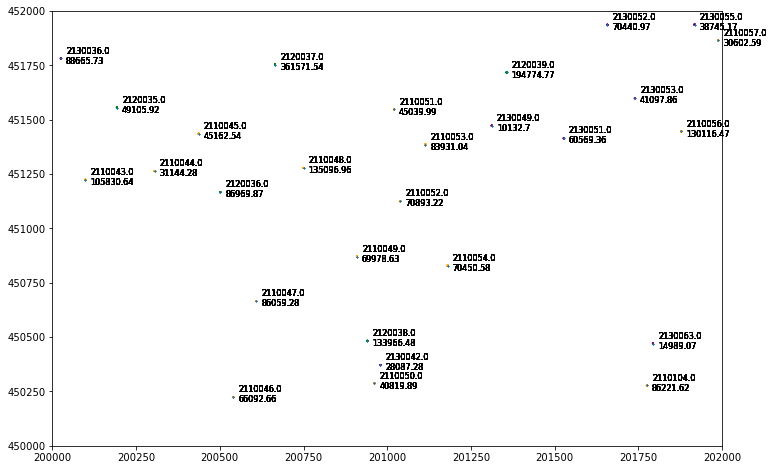

In [109]:
# assign a color to each code
colors = {2110001: 'red', 2115001: 'orange', 2120001: 'yellow', 2125001: 'green',
          2130001: 'blue', 2135001: 'purple'}
colors_list = ['red' if code <= 2110001
               else 'orange' if code <= 2115001
               else 'yellow' if code <= 2120001
               else 'green' if code <= 2125001
               else 'blue' if code <= 2130001
               else 'purple' for code in xy['TRDAR_CD']]

fig = plt.figure(figsize=(12, 8))

# plot the points with different colors based on the code
plt.scatter(xy['X_VALUE'], xy['Y_VALUE'], c=colors_list, s=1)

# plot the points
plt.scatter(xy['X_VALUE'], xy['Y_VALUE'], label=xy['TRDAR_CD'], s=0.1)

# annotate each point with its code
for i, point in xy.iterrows():
    plt.annotate(point['TRDAR_CD'], (point['X_VALUE'], point['Y_VALUE']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
    plt.annotate(point['RELM_AR'], (point['X_VALUE'], point['Y_VALUE']),
                 xytext=(5, -5), textcoords='offset points', fontsize=8)
print('Wait a minute...')
    
plt.xlim(200000, 202000)
plt.ylim(450000, 452000)
plt.show()

In [1]:
# assign a color to each code
colors = {2110001: 'red', 2115001: 'orange', 2120001: 'yellow', 2125001: 'green',
          2130001: 'blue', 2135001: 'purple'}
colors_list = ['red' if code <= 2110001
               else 'orange' if code <= 2115001
               else 'yellow' if code <= 2120001
               else 'green' if code <= 2125001
               else 'blue' if code <= 2130001
               else 'purple' for code in xy['TRDAR_CD']]

fig = plt.figure(figsize=(12, 8))

# plot the points with different colors based on the code
plt.scatter(xy['X_VALUE'], xy['Y_VALUE'], c=colors_list, s=1)

plt.show()

NameError: name 'xy' is not defined